In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('covtype.CSV',header=-1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
headers=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4']

In [5]:
headers_init=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type']

In [6]:
soiltypes=[]
for i in range(1,41):
    soiltypes.append('Soil_Type_'+str(i))

soiltypes.append('Cover_Type')

In [7]:
for i in range(len(soiltypes)):
    headers.append(soiltypes[i])

In [8]:
data.columns=headers

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_1                     581012 non-null int64
Wilderness_Area_2                     581012 non-null int64
Wilderness_Area_3                     581012 non-null int64
Wilderness_Area_4                     581012 non-null int64
Soil_Type_1                           581012 non-

In [10]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data.Cover_Type)

In [14]:
train.shape

(406708, 55)

In [15]:
test.shape

(174304, 55)

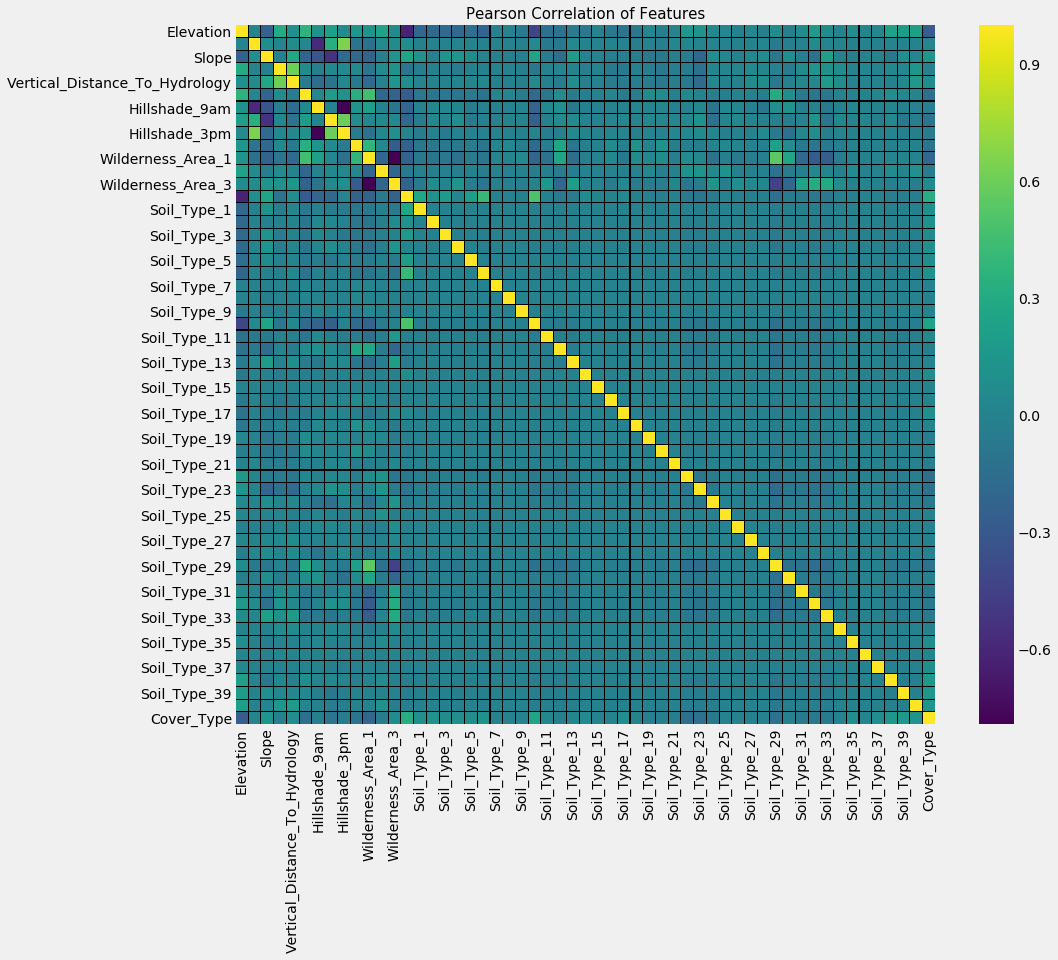

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.0, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.05,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=False)

In [17]:
for col_name in soiltypes:
    if train[col_name].dtype=='int64':
        unique_cat=len(train[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- Soil_Type_1 has 2 unique categories
Feature:- Soil_Type_2 has 2 unique categories
Feature:- Soil_Type_3 has 2 unique categories
Feature:- Soil_Type_4 has 2 unique categories
Feature:- Soil_Type_5 has 2 unique categories
Feature:- Soil_Type_6 has 2 unique categories
Feature:- Soil_Type_7 has 2 unique categories
Feature:- Soil_Type_8 has 2 unique categories
Feature:- Soil_Type_9 has 2 unique categories
Feature:- Soil_Type_10 has 2 unique categories
Feature:- Soil_Type_11 has 2 unique categories
Feature:- Soil_Type_12 has 2 unique categories
Feature:- Soil_Type_13 has 2 unique categories
Feature:- Soil_Type_14 has 2 unique categories
Feature:- Soil_Type_15 has 2 unique categories
Feature:- Soil_Type_16 has 2 unique categories
Feature:- Soil_Type_17 has 2 unique categories
Feature:- Soil_Type_18 has 2 unique categories
Feature:- Soil_Type_19 has 2 unique categories
Feature:- Soil_Type_20 has 2 unique categories
Feature:- Soil_Type_21 has 2 unique categories
Feature:- Soil_Type_22

In [18]:
#Remove Constant columns
train_cons = []
test_cons=[]
for col in train.columns:
    if train[col].std() == 0:
        train_cons.append(col)
        test_cons.append(col)

train=train.drop(train_cons,axis=1)
test=test.drop(test_cons,axis=1)

In [19]:
def feature_engineering(data2,train_cons):
    
    
    data = data2
    
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
         
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
     
    data['Distanse_to_Hydrology'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
     
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
     
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
     
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
     
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    
    #data['Soil']=0
    #for i in range(1,41):
    #    if ('Soil_Type_'+str(i)) not in train_cons:
    #        data['Soil']=data['Soil']+i*data['Soil_Type_'+str(i)]
      
     
    #data['Wilderness_Area']=0
    #for i in range(1,5):
    #    data['Wilderness_Area']=data['Wilderness_Area']+i*data['Wilderness_Area_'+str(i)]
      
    return data

In [20]:
train_df = feature_engineering(train,train_cons)
test_df = feature_engineering(test,train_cons)

In [21]:
def get_features():
    return ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
    'Ele_minus_VDtHyd','Ele_plus_VDtHyd','Distanse_to_Hydrology','Hydro_plus_Fire','Hydro_minus_Fire','Hydro_plus_Road',
    'Hydro_minus_Road','Fire_plus_Road','Fire_minus_Road']

In [22]:
features_imp=get_features()
for i in range(1,41):
    features_imp.append('Soil_Type_'+str(i))
for j in range(1,5):
    features_imp.append('Wilderness_Area_'+str(j))

In [23]:
X_train=train_df[features_imp]
X_test=test_df[features_imp]

In [24]:
Y_train=train_df[['Cover_Type']]
Y_test=test_df[['Cover_Type']]

In [25]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
15190,2736,4,15,60,17,3064,200,211,147,6249,...,0,0,0,0,0,0,1,0,0,0
560331,2600,195,33,256,115,1074,195,245,161,1050,...,0,0,0,0,0,0,0,0,1,0
323159,2922,123,13,192,48,1530,241,230,115,2078,...,0,0,0,0,0,0,0,0,1,0
349637,3111,291,8,446,45,2355,197,239,181,2491,...,0,0,0,0,0,0,0,0,1,0
137117,2760,18,5,330,9,1806,216,229,150,698,...,0,0,0,0,0,0,1,0,0,0


In [26]:
Y_train=Y_train-1
Y_test=Y_test-1

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
features_num=get_features()

In [29]:
X_train_num_Scld=StandardScaler().fit_transform(X_train[features_num])

In [30]:
len(features_num)

19

In [31]:
X_train.loc[:,:len(features_num)]=X_train_num_Scld

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406708 entries, 15190 to 269194
Data columns (total 63 columns):
Elevation                             406708 non-null float64
Aspect                                406708 non-null float64
Slope                                 406708 non-null float64
Horizontal_Distance_To_Hydrology      406708 non-null float64
Vertical_Distance_To_Hydrology        406708 non-null float64
Horizontal_Distance_To_Roadways       406708 non-null float64
Hillshade_9am                         406708 non-null float64
Hillshade_Noon                        406708 non-null float64
Hillshade_3pm                         406708 non-null float64
Horizontal_Distance_To_Fire_Points    406708 non-null float64
Ele_minus_VDtHyd                      406708 non-null float64
Ele_plus_VDtHyd                       406708 non-null float64
Distanse_to_Hydrology                 406708 non-null float64
Hydro_plus_Fire                       406708 non-null float64
Hydro_minus_Fire 

In [33]:
X_test_num_Scld=StandardScaler().fit_transform(X_test[features_num])

In [34]:
len(features_num)

19

In [35]:
X_test.loc[:,:len(features_num)]=X_test_num_Scld

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174304 entries, 3990 to 469778
Data columns (total 63 columns):
Elevation                             174304 non-null float64
Aspect                                174304 non-null float64
Slope                                 174304 non-null float64
Horizontal_Distance_To_Hydrology      174304 non-null float64
Vertical_Distance_To_Hydrology        174304 non-null float64
Horizontal_Distance_To_Roadways       174304 non-null float64
Hillshade_9am                         174304 non-null float64
Hillshade_Noon                        174304 non-null float64
Hillshade_3pm                         174304 non-null float64
Horizontal_Distance_To_Fire_Points    174304 non-null float64
Ele_minus_VDtHyd                      174304 non-null float64
Ele_plus_VDtHyd                       174304 non-null float64
Distanse_to_Hydrology                 174304 non-null float64
Hydro_plus_Fire                       174304 non-null float64
Hydro_minus_Fire  

Text(0.5,0,'Target Class')

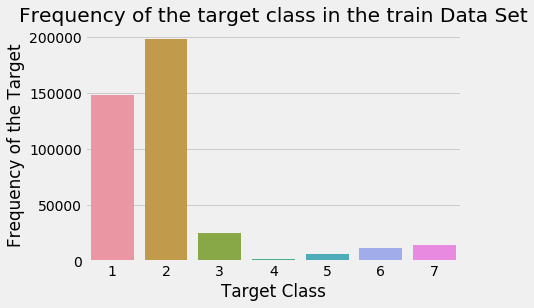

In [37]:
ax=sns.countplot(x='Cover_Type', data=train_df);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

Text(0.5,0,'Target Class')

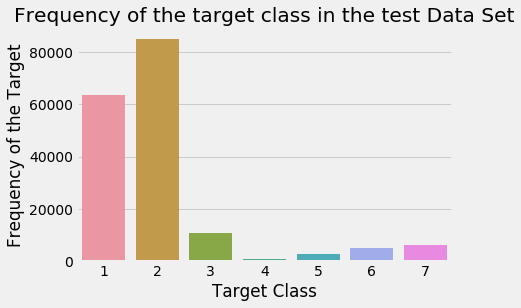

In [38]:
ax=sns.countplot(x='Cover_Type', data=test_df);
total=float(len(data))
plt.title('Frequency of the target class in the test Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

# Without Noise

In [39]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

Using TensorFlow backend.
/usr/local/anaconda3/5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [40]:
Y_train.shape

(406708, 1)

In [41]:
X_train_r,X_valid,Y_train_r,Y_valid=train_test_split(X_train,Y_train,test_size=0.1,random_state=0,stratify=Y_train.Cover_Type)

In [61]:
nb_classes=7
l1_num_neuron=500
l2_num_neuron=300
l3_num_neuron=200
l4_num_neuron=100
#l5_num_neuron=100
output_neuron=nb_classes

In [72]:
layer_1 = Dense(l1_num_neuron, activation='relu',kernel_initializer='RandomUniform',kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1])
layer_2 = Dense(l2_num_neuron, activation='relu',kernel_initializer='RandomUniform',kernel_regularizer=regularizers.l2(0.01))
layer_3 = Dense(l3_num_neuron, activation='relu',kernel_initializer='RandomUniform',kernel_regularizer=regularizers.l2(0.01))
layer_4 = Dense(l4_num_neuron, activation='relu',kernel_initializer='RandomUniform',kernel_regularizer=regularizers.l2(0.01))
layer_out = Dense(output_neuron, activation='softmax',kernel_regularizer=regularizers.l2(0.01))

In [73]:
mlp=Sequential()
mlp.add(layer_1)
mlp.add(Dropout(0.1))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_2)
mlp.add(Dropout(0.3))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_3)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_4)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
#mlp.add(layer_5)
mlp.add(layer_out)

In [74]:
#optim=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
mlp.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [75]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               32000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 500)               2000      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               60200     
__________

In [76]:
Y_train_r.shape

(366037, 1)

In [77]:
from keras.callbacks import EarlyStopping
train_res = mlp.fit(X_train_r.values,
                      Y_train_r.values.ravel(),
                      batch_size=500,
                      epochs=200,
                      verbose=True,
                      validation_data=(X_valid.values,
                                       Y_valid.values.ravel()),
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',
                                     verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/200
366037/366037 [==============================] - 12s 32us/step - loss: 1.9757 - acc: 0.7364 - val_loss: 1.2781 - val_acc: 0.7447
Epoch 2/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.9878 - acc: 0.7845 - val_loss: 0.8367 - val_acc: 0.7854
Epoch 3/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.7150 - acc: 0.8080 - val_loss: 0.6156 - val_acc: 0.8292
Epoch 4/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.6043 - acc: 0.8259 - val_loss: 0.5509 - val_acc: 0.8430
Epoch 5/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.5509 - acc: 0.8362 - val_loss: 0.5254 - val_acc: 0.8446
Epoch 6/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.5193 - acc: 0.8455 - val_loss: 0.4768 - val_acc: 0.8605
Epoch 7/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.4998 - acc: 0.8504

366037/366037 [==============================] - 11s 31us/step - loss: 0.3635 - acc: 0.9047 - val_loss: 0.3122 - val_acc: 0.9265
Epoch 59/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.3635 - acc: 0.9041 - val_loss: 0.3141 - val_acc: 0.9253
Epoch 60/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.3618 - acc: 0.9050 - val_loss: 0.3129 - val_acc: 0.9261
Epoch 61/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.3619 - acc: 0.9050 - val_loss: 0.3109 - val_acc: 0.9263
Epoch 62/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.3616 - acc: 0.9054 - val_loss: 0.3139 - val_acc: 0.9250
Epoch 63/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.3607 - acc: 0.9059 - val_loss: 0.3119 - val_acc: 0.9262
Epoch 64/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.3603 - acc: 0.9059 - val_loss: 0.3097 - val_acc: 0.9262
Epoch 65/200
366037

In [78]:
predictions=mlp.predict_classes(X_test.values,verbose=True)

174304/174304 [==============================] - 9s 52us/step


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values.ravel(),predictions)

0.9266626124472187

In [80]:
import itertools

def plot_confusion_matrix(axd,cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.sca(axd)
    plt.figure(figsize=(15,10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1#print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",size=16)
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')

In [81]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

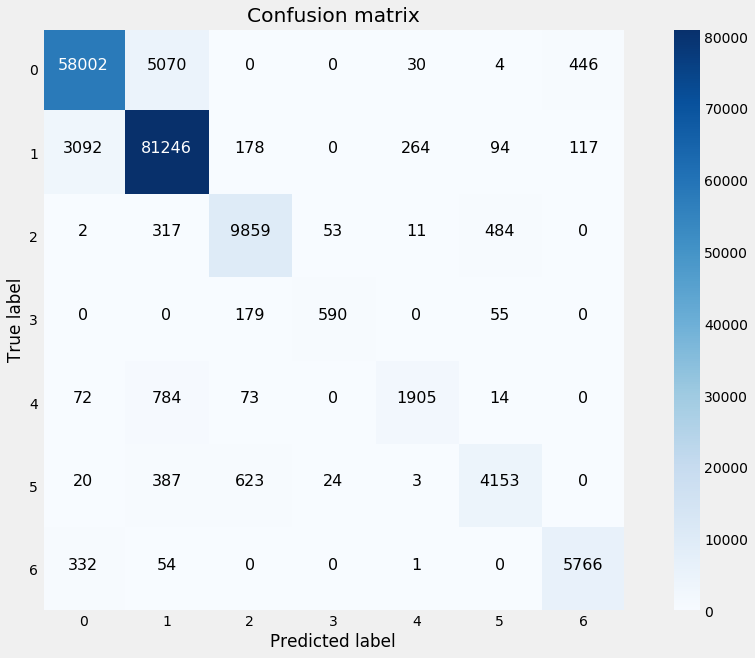

In [82]:
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 10))
plot_confusion_matrix(0,cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()

In [60]:
#np.random.get_state()

In [71]:
print(classification_report(Y_test.values,predictions))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93     63552
          1       0.94      0.95      0.94     84991
          2       0.91      0.92      0.91     10726
          3       0.91      0.70      0.79       824
          4       0.84      0.72      0.78      2848
          5       0.84      0.84      0.84      5210
          6       0.94      0.94      0.94      6153

avg / total       0.93      0.93      0.93    174304



# Noise conisderation

In [83]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

In [84]:
plt.style.use('ggplot')

In [85]:
NOISE_LEVEL=0.3  # what part of training labels are permuted
#perm = np.array([6, 0, 4, 2, 1, 3, 5])  # noise permutation (from Reed)

In [86]:
Y_train=train_df['Cover_Type']-1

In [87]:
Y_test=test_df['Cover_Type']-1

In [88]:
#noise = perm[Y_train]

In [89]:
seed=0
nb_classes = 7

In [90]:
#X_train=X_train_red_rf_features

In [91]:
n_train_data,dim=X_train.shape
n_test_data,dim_test=X_test.shape
Y_train=Y_train.values.reshape(n_train_data,1)
Y_test=Y_test.values.reshape(n_test_data,1)

In [92]:
nhiddens = [500,300,200,100]
DROPOUT=0.3
#opt='adam'
batch_size = 300
patience = 4  # Early stopping patience
epochs = 400  # number of epochs to train on

In [240]:
def castLabel(y, t):
    if -1 in y:
        if t == -1:
            y_new = y
        elif t == 0:
            y_new = np.divide((y + 1) ,2)
        elif t == 2:
            y_new = np.divide((y + 3),2)
    elif 0 in y:
        if (t == -1):
            y_new = (y * 2) - 1
        elif (t == 0):
            y_new = y
        elif (t == 2):
            y_new = y + 1
    elif 2 in y:
        if (t == -1):
            y_new = (y * 2) - 3
        elif (t == 0):
            y_new = y - 1
        elif (t == 2):
            y_new = y
    return y_new

In [422]:
def injectLabelNoise(y,flipRate):
    fd  =  -np.ones((y.shape))
    yz  =  castLabel(y,-1)
    y   =  castLabel(y,2)

    # sampling some numbers
    for i in range(0,2):
        prob    = np.random.rand(y.shape[0],1)
        idx     = np.where((y==i+1) & (prob <= flipRate[i]))
        #print(idx)
        yz[idx[0]] = -yz[idx[0]]
        fd[idx[0]] = -fd[idx[0]]
    yz = castLabel(yz,2)
    return yz, fd

In [499]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
Y_train_df=pd.get_dummies(Y_train_df,columns=['Cover_Type'])

In [500]:
Y_train_df[['Cover_Type_0']].values.astype(np.int64)

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [1],
       [0]])

In [501]:
yz_noise=pd.DataFrame()
for i in range(0,7):
    cols_str='Cover_Type_'+str(i)
    yz, fd=injectLabelNoise(Y_train_df[[cols_str]].values.astype(np.int64), [0.05,0.05,0.02,0.02,0.02,0.02,0.02])
    yz=(castLabel(yz,0))
    yz_noise[str(i)]=yz.flatten()

In [502]:
yz=yz_noise.values
yz=np.argmax(yz,axis=1)

In [503]:
yz=yz.reshape(len(yz),1)

In [504]:
NOISE= round(1. - np.mean(yz == Y_train),2)

In [505]:
NOISE

0.080000000000000002

In [506]:
Y_train_noise=yz

In [507]:
Y_train_noise=Y_train_noise.flatten()

In [508]:
#import matplotlib
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 14}
#matplotlib.rc('font', **font)

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


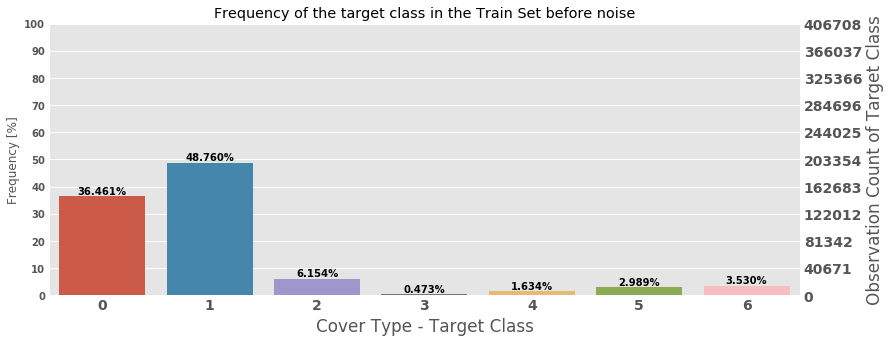

In [509]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
import matplotlib.ticker as ticker
plt.figure(figsize=(12,5))
ax=sns.countplot(x='Cover_Type', data=Y_train_df);
plt.style.use('ggplot')
total=float(len(Y_train_df))
plt.title('Frequency of the target class in the Train Set before noise');
plt.ylabel('Observation Count of Target Class');
plt.xlabel('Cover Type - Target Class');
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/total), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,total)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


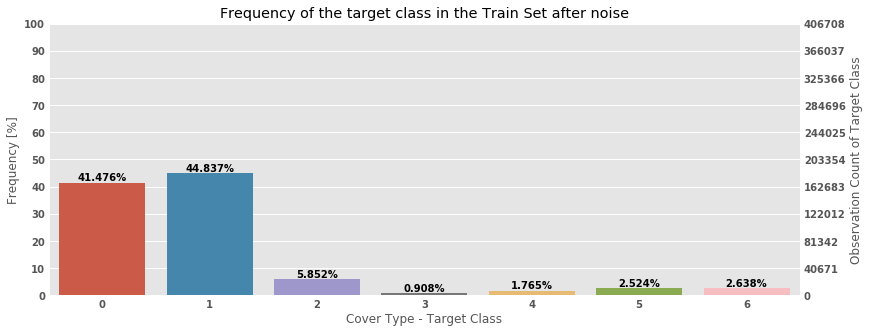

In [510]:
Y_train_df_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])
import matplotlib.ticker as ticker
plt.figure(figsize=(12,5))
ax=sns.countplot(x='Cover_Type', data=Y_train_df_noise);
plt.style.use('ggplot')
total=float(len(Y_train_df_noise))
plt.title('Frequency of the target class in the Train Set after noise');
plt.ylabel('Observation Count of Target Class');
plt.xlabel('Cover Type - Target Class');
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/total), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,total)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [511]:
from sklearn.model_selection import StratifiedShuffleSplit
#_, noise_idx = next(iter(StratifiedShuffleSplit(n_splits=1,
#                                                test_size=NOISE_LEVEL,
#                                                random_state=seed).split(X_train,Y_train.ravel())))
#Y_train_noise = Y_train.copy()
#noise=noise.reshape(n_train_data,1)
#Y_train_noise[noise_idx] = noise[noise_idx]

In [512]:
#1. - np.mean(Y_train_noise == Y_train)

In [513]:
# break the training set to 10% validation which we will use for early stopping.
train_idx, val_idx = next(iter(
        StratifiedShuffleSplit(n_splits=1, test_size=0.1,
                               random_state=0).split(X_train, Y_train_noise))) #.values
X_train=X_train
X_train_train = X_train[train_idx]
Y_train_train = Y_train_noise[train_idx]
X_train_val = X_train[val_idx]
Y_train_val = Y_train_noise[val_idx]

In [514]:
from keras import regularizers
from keras.models import Sequential
hidden_layers = Sequential(name='hidden')

In [515]:
from keras.layers import Dense, Dropout, Activation
for i, nhidden in enumerate(nhiddens):
    hidden_layers.add(Dense(nhidden,kernel_regularizer=regularizers.l2(0.01),
                            input_shape=(X_train.shape[1],) if i == 0 else []))
    hidden_layers.add(Activation('relu'))
    hidden_layers.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
    hidden_layers.add(Dropout(DROPOUT))

In [516]:
from keras.layers import Input
train_inputs = Input(shape=(X_train.shape[1],))

In [517]:
last_hidden = hidden_layers(train_inputs)
baseline_output = Dense(nb_classes, activation='softmax', name='baseline',kernel_regularizer=regularizers.l2(0.01))(last_hidden)

In [518]:
from keras.models import Model
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
model = Model(inputs=train_inputs, outputs=baseline_output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [519]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
Total params: 267,707
Trainable params: 265,507
Non-trainable params: 2,200
_________________________________________________________________


In [520]:
def eval(model,y_test=Y_test):
    return dict(zip(model.metrics_names,model.evaluate(X_test.values,y_test, verbose=False)))

In [521]:
eval(model)

{'acc': 0.11153501927666605, 'loss': 10.695745457284534}

In [522]:
from keras.callbacks import EarlyStopping
train_res = model.fit(X_train_train,
                      Y_train_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=True,
                      validation_data=(X_train_val,
                                       Y_train_val),
                      callbacks=
                      [EarlyStopping(patience=patience,mode='min',
                                     verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/400
366037/366037 [==============================] - 15s 41us/step - loss: 4.5423 - acc: 0.6642 - val_loss: 2.0778 - val_acc: 0.7002
Epoch 2/400
366037/366037 [==============================] - 14s 38us/step - loss: 1.4940 - acc: 0.7025 - val_loss: 1.0921 - val_acc: 0.7279
Epoch 3/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.9866 - acc: 0.7208 - val_loss: 0.8473 - val_acc: 0.7478
Epoch 4/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.8393 - acc: 0.7351 - val_loss: 0.7644 - val_acc: 0.7588
Epoch 5/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.7792 - acc: 0.7461 - val_loss: 0.7277 - val_acc: 0.7661
Epoch 6/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.7506 - acc: 0.7524 - val_loss: 0.7035 - val_acc: 0.7726
Epoch 7/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.7323 - acc: 0.7586

In [523]:
eval(model)

{'acc': 0.89497085551679822, 'loss': 0.40655190009457576}

In [524]:
ybaseline_predict = model.predict(X_train,batch_size=batch_size)

In [525]:
ybaseline_predict = np.argmax(ybaseline_predict, axis=-1)

In [526]:
ybaseline_predict=ybaseline_predict.reshape(ybaseline_predict.shape[0],1)

In [527]:
ybaseline_predict.shape

(406708, 1)

In [528]:
Y_train_noise=Y_train_noise.flatten()

In [529]:
Y_train_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])

In [530]:
Y_train_noise=Y_train_noise.astype('int')

In [531]:
Y_train_noise.head()

,Cover_Type
0,1
1,1
2,1
3,1
4,1


In [532]:
baseline_confusion = np.zeros((nb_classes, nb_classes))
for n, p in zip(Y_train_noise.values.ravel(), ybaseline_predict):
    baseline_confusion[p, n] += 1.

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


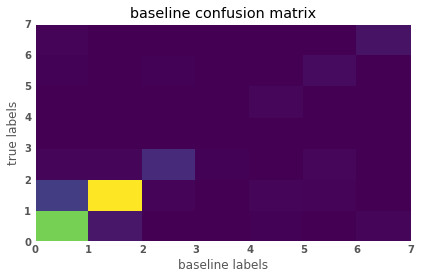

In [533]:
import matplotlib.pyplot as plt
%matplotlib inline
# perm_bias_weights.astype(int)
plt.pcolor(baseline_confusion)
plt.ylabel('true labels')
plt.xlabel('baseline labels')
plt.title('baseline confusion matrix');

In [534]:
BETA = 0

In [535]:
#baseline_confusion

In [536]:
channel_weights = baseline_confusion.copy()
#channel_weights=channel_weights + 1e-8
channel_weights /= channel_weights.sum(axis=1, keepdims=True)
# perm_bias_weights[prediction,noisy_label] = log(P(noisy_label|prediction))
channel_weights = np.log(channel_weights+1e-8)

In [537]:
from channel import Channel
channeled_output = Channel(name='channel',weights=[channel_weights],kernel_regularizer=regularizers.l2(0.01))(baseline_output)

In [538]:
if BETA ==1:
    simple_model = Model(inputs=train_inputs, outputs=[baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
else:
    simple_model = Model(inputs=train_inputs, outputs=[channeled_output, baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',loss_weights=[1.-BETA, BETA],optimizer=sgd,metrics=['accuracy'])

In [539]:
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
_________________________________________________________________
channel (Channel)            (None, 7)                 49        
Total params: 267,756
Trainable params: 265,556
Non-trainable params: 2,200
_________________________________________________________________


In [540]:
train_res = simple_model.fit(X_train_train,
                      [Y_train_train,Y_train_train],
                      batch_size=batch_size,
                      epochs=100,
                      verbose=True,
                      validation_data=(X_train_val,
                                       [Y_train_val,Y_train_val]),
                      callbacks=
                      [EarlyStopping(patience=3,mode='min',verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/100
366037/366037 [==============================] - 15s 42us/step - loss: 7.8393 - channel_loss: 0.6028 - baseline_loss: 0.5891 - channel_acc: 0.8023 - baseline_acc: 0.8037 - val_loss: 7.5569 - val_channel_loss: 0.5634 - val_baseline_loss: 0.5603 - val_channel_acc: 0.8260 - val_baseline_acc: 0.8267
Epoch 2/100
366037/366037 [==============================] - 14s 39us/step - loss: 7.3624 - channel_loss: 0.5977 - baseline_loss: 0.6061 - channel_acc: 0.8049 - baseline_acc: 0.8055 - val_loss: 7.1015 - val_channel_loss: 0.5601 - val_baseline_loss: 0.5668 - val_channel_acc: 0.8295 - val_baseline_acc: 0.8302
Epoch 3/100
366037/366037 [==============================] - 14s 39us/step - loss: 6.9294 - channel_loss: 0.5982 - baseline_loss: 0.6160 - channel_acc: 0.8055 - baseline_acc: 0.8061 - val_loss: 6.6882 - val_channel_loss: 0.5620 - val_baseline_loss: 0.5786 - val_channel_acc: 0.8288 - val_baseline_acc: 0.8285
Epoch 4/100
366037/366

366037/366037 [==============================] - 14s 39us/step - loss: 2.4657 - channel_loss: 0.6627 - baseline_loss: 0.6555 - channel_acc: 0.8080 - baseline_acc: 0.8109 - val_loss: 2.3944 - val_channel_loss: 0.6280 - val_baseline_loss: 0.6177 - val_channel_acc: 0.8310 - val_baseline_acc: 0.8335
Epoch 28/100
366037/366037 [==============================] - 14s 39us/step - loss: 2.3962 - channel_loss: 0.6647 - baseline_loss: 0.6550 - channel_acc: 0.8079 - baseline_acc: 0.8105 - val_loss: 2.3277 - val_channel_loss: 0.6307 - val_baseline_loss: 0.6149 - val_channel_acc: 0.8303 - val_baseline_acc: 0.8333
Epoch 29/100
366037/366037 [==============================] - 14s 39us/step - loss: 2.3302 - channel_loss: 0.6662 - baseline_loss: 0.6544 - channel_acc: 0.8081 - baseline_acc: 0.8110 - val_loss: 2.2643 - val_channel_loss: 0.6326 - val_baseline_loss: 0.6157 - val_channel_acc: 0.8302 - val_baseline_acc: 0.8328
Epoch 30/100
366037/366037 [==============================] - 14s 39us/step - loss:

366037/366037 [==============================] - 14s 39us/step - loss: 1.4844 - channel_loss: 0.6910 - baseline_loss: 0.6488 - channel_acc: 0.8071 - baseline_acc: 0.8122 - val_loss: 1.4429 - val_channel_loss: 0.6588 - val_baseline_loss: 0.6164 - val_channel_acc: 0.8279 - val_baseline_acc: 0.8335
Epoch 54/100
366037/366037 [==============================] - 14s 39us/step - loss: 1.4667 - channel_loss: 0.6916 - baseline_loss: 0.6498 - channel_acc: 0.8071 - baseline_acc: 0.8121 - val_loss: 1.4236 - val_channel_loss: 0.6572 - val_baseline_loss: 0.6116 - val_channel_acc: 0.8312 - val_baseline_acc: 0.8357
Epoch 55/100
366037/366037 [==============================] - 14s 39us/step - loss: 1.4496 - channel_loss: 0.6919 - baseline_loss: 0.6489 - channel_acc: 0.8078 - baseline_acc: 0.8129 - val_loss: 1.4083 - val_channel_loss: 0.6590 - val_baseline_loss: 0.6110 - val_channel_acc: 0.8288 - val_baseline_acc: 0.8334
Epoch 56/100
366037/366037 [==============================] - 14s 39us/step - loss:

366037/366037 [==============================] - 14s 39us/step - loss: 1.2014 - channel_loss: 0.7010 - baseline_loss: 0.6517 - channel_acc: 0.8070 - baseline_acc: 0.8131 - val_loss: 1.1639 - val_channel_loss: 0.6667 - val_baseline_loss: 0.6169 - val_channel_acc: 0.8281 - val_baseline_acc: 0.8348
Epoch 80/100
366037/366037 [==============================] - 14s 39us/step - loss: 1.1948 - channel_loss: 0.7007 - baseline_loss: 0.6504 - channel_acc: 0.8064 - baseline_acc: 0.8128 - val_loss: 1.1581 - val_channel_loss: 0.6671 - val_baseline_loss: 0.6107 - val_channel_acc: 0.8290 - val_baseline_acc: 0.8348
Epoch 81/100
366037/366037 [==============================] - 14s 39us/step - loss: 1.1886 - channel_loss: 0.7007 - baseline_loss: 0.6487 - channel_acc: 0.8071 - baseline_acc: 0.8132 - val_loss: 1.1532 - val_channel_loss: 0.6682 - val_baseline_loss: 0.6138 - val_channel_acc: 0.8289 - val_baseline_acc: 0.8343
Epoch 82/100
366037/366037 [==============================] - 14s 39us/step - loss:

In [541]:
eval(simple_model,y_test=[Y_test,Y_test])

{'baseline_acc': 0.9010062878648798,
 'baseline_loss': 0.27930392991879327,
 'channel_acc': 0.88894116027170922,
 'channel_loss': 0.54936475111012595,
 'loss': 0.9520515146792996}

In [542]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
3990,-2.940916,-1.176484,0.920171,-1.127079,-0.676873,-0.787048,-0.342117,-1.737584,-0.717244,-0.383433,...,0,0,0,0,0,0,0,0,0,1
269758,-2.905167,-0.675744,0.652874,-0.561127,0.594638,-1.302943,1.075192,-1.079161,-1.526362,-1.054360,...,0,0,0,0,0,0,0,0,0,1
418575,-0.556407,1.577588,0.118281,-0.443220,-0.401952,-0.043006,-1.050771,-0.167499,0.848791,-0.728719,...,0,0,0,0,0,0,0,0,1,0
227405,-1.014004,1.121557,3.192193,1.240486,2.897103,-1.001737,-4.407555,-0.522034,2.649731,-0.094058,...,0,0,0,0,0,0,0,0,1,0
540541,1.517079,1.362985,1.722061,-0.363044,0.422812,-0.656312,-2.766461,-0.522034,1.762311,-0.247434,...,0,0,0,0,1,0,0,1,0,0


In [543]:
preds=simple_model.predict(X_test.values)

In [544]:
preds_max=np.argmax(preds[0],axis=-1)

In [545]:
preds_max.shape

(174304,)

In [546]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [547]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [548]:
Y_test_df=pd.DataFrame(Y_test,columns=['Cover_Type'])

In [549]:
Y_test_df['Cover_Type'].value_counts()

1    84991
0    63552
2    10726
6     6153
5     5210
4     2848
3      824
Name: Cover_Type, dtype: int64

In [550]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


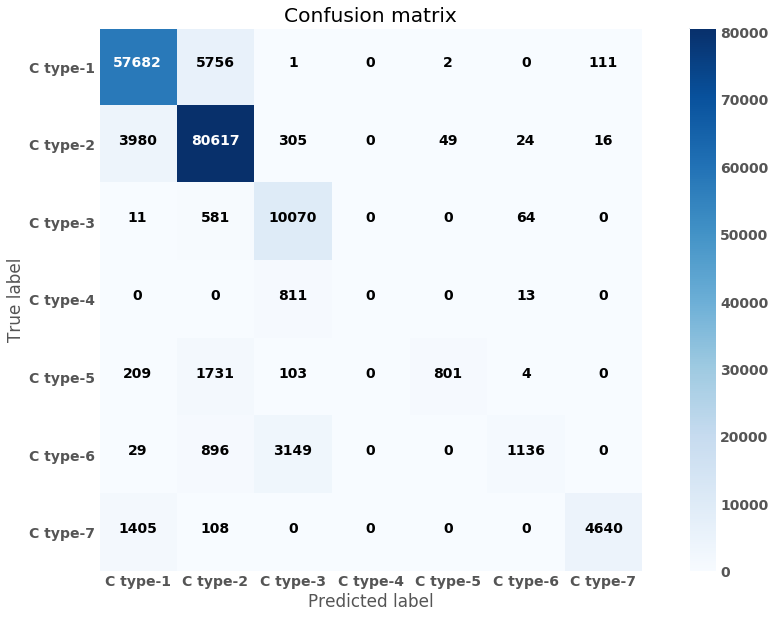

In [551]:
cnf_matrix = confusion_matrix(Y_test,preds_max)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = class_names = ['C type-1','C type-2','C type-3','C type-4','C type-5','C type-6','C type-7']
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()

In [552]:
from sklearn.metrics import accuracy_score

In [553]:
accuracy_score(Y_test,preds_max.ravel())

0.88894116027170922

In [554]:
print('------------------------Classification Report-------------------------------')
print(classification_report(Y_test,preds_max.ravel()))

------------------------Classification Report-------------------------------
             precision    recall  f1-score   support

          0       0.91      0.91      0.91     63552
          1       0.90      0.95      0.92     84991
          2       0.70      0.94      0.80     10726
          3       0.00      0.00      0.00       824
          4       0.94      0.28      0.43      2848
          5       0.92      0.22      0.35      5210
          6       0.97      0.75      0.85      6153

avg / total       0.89      0.89      0.88    174304



/usr/local/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
from keras.layers import merge
from keras.layers import concatenate
from keras.layers import Dot
from keras.layers import Reshape

In [119]:
channel_matrix = [Dense(nb_classes,activation='softmax',kernel_regularizer=regularizers.l2(0.01),name='dense_class%d'%i,weights=[0.05*(np.random.random((nhidden,nb_classes)) - 0.5),channel_weights[i]])(last_hidden)for i in range(nb_classes)]
channel_matrix = concatenate(channel_matrix)
channel_matrix = Reshape((nb_classes,nb_classes))(channel_matrix)
channeled_output = merge([channel_matrix, baseline_output], mode='dot', dot_axes=(1,1), name='channel')

/home/namanda/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  after removing the cwd from sys.path.
/home/namanda/anaconda3.6/lib/python3.6/site-packages/keras/legacy/layers.py:464: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [122]:
if BETA ==1:
    complex_model = Model(inputs=train_inputs, outputs=[baseline_output])
    complex_model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
else:
    complex_model = Model(inputs=train_inputs, outputs=[channeled_output, baseline_output])
    complex_model.compile(loss='sparse_categorical_crossentropy',loss_weights=[1.-BETA, BETA],optimizer=sgd,metrics=['accuracy'])

In [123]:
complex_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 63)           0                                            
__________________________________________________________________________________________________
hidden (Sequential)             (None, 100)          267000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_class0 (Dense)            (None, 7)            707         hidden[1][0]                     
__________________________________________________________________________________________________
dense_class1 (Dense)            (None, 7)            707         hidden[1][0]                     
__________________________________________________________________________________________________
dense_clas

In [124]:
train_res_complex = complex_model.fit(X_train_train,
                      [Y_train_train,Y_train_train],
                      batch_size=batch_size,
                      epochs=200000,
                      verbose=True,
                      validation_data=(X_train_val,
                                       [Y_train_val,Y_train_val]),
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/200000
366037/366037 [==============================] - 26s 70us/step - loss: 0.6746 - channel_loss: 0.5940 - baseline_loss: 0.6993 - channel_acc: 0.7410 - baseline_acc: 0.7409 - val_loss: 0.6388 - val_channel_loss: 0.5582 - val_baseline_loss: 0.6525 - val_channel_acc: 0.7622 - val_baseline_acc: 0.7625
Epoch 2/200000
366037/366037 [==============================] - 22s 60us/step - loss: 0.6712 - channel_loss: 0.5908 - baseline_loss: 0.6917 - channel_acc: 0.7415 - baseline_acc: 0.7415 - val_loss: 0.6369 - val_channel_loss: 0.5565 - val_baseline_loss: 0.6475 - val_channel_acc: 0.7615 - val_baseline_acc: 0.7611
Epoch 3/200000
366037/366037 [==============================] - 18s 48us/step - loss: 0.6691 - channel_loss: 0.5889 - baseline_loss: 0.6859 - channel_acc: 0.7418 - baseline_acc: 0.7418 - val_loss: 0.6346 - val_channel_loss: 0.5545 - val_baseline_loss: 0.6413 - val_channel_acc: 0.7628 - val_baseline_acc: 0.7628
Epoch 4/20000

366037/366037 [==============================] - 14s 37us/step - loss: 0.6572 - channel_loss: 0.5795 - baseline_loss: 0.6528 - channel_acc: 0.7428 - baseline_acc: 0.7427 - val_loss: 0.6223 - val_channel_loss: 0.5447 - val_baseline_loss: 0.6107 - val_channel_acc: 0.7634 - val_baseline_acc: 0.7635
Epoch 28/200000
366037/366037 [==============================] - 14s 37us/step - loss: 0.6570 - channel_loss: 0.5793 - baseline_loss: 0.6524 - channel_acc: 0.7428 - baseline_acc: 0.7427 - val_loss: 0.6222 - val_channel_loss: 0.5445 - val_baseline_loss: 0.6088 - val_channel_acc: 0.7630 - val_baseline_acc: 0.7634
Epoch 29/200000
366037/366037 [==============================] - 14s 37us/step - loss: 0.6571 - channel_loss: 0.5795 - baseline_loss: 0.6512 - channel_acc: 0.7427 - baseline_acc: 0.7424 - val_loss: 0.6219 - val_channel_loss: 0.5443 - val_baseline_loss: 0.6106 - val_channel_acc: 0.7639 - val_baseline_acc: 0.7631
Epoch 30/200000
366037/366037 [==============================] - 16s 45us/ste

In [125]:
eval(complex_model,y_test=[Y_test,Y_test])

{'baseline_acc': 0.90085712318707545,
 'baseline_loss': 0.28756390722362146,
 'channel_acc': 0.90097186524692496,
 'channel_loss': 0.3803366002154302,
 'loss': 0.45653821197216155}

In [129]:
preds_complex=complex_model.predict(X_test.values)

In [130]:
preds_max_complex=np.argmax(preds_complex[0],axis=-1)

In [131]:
preds_max_complex.shape

(174304,)

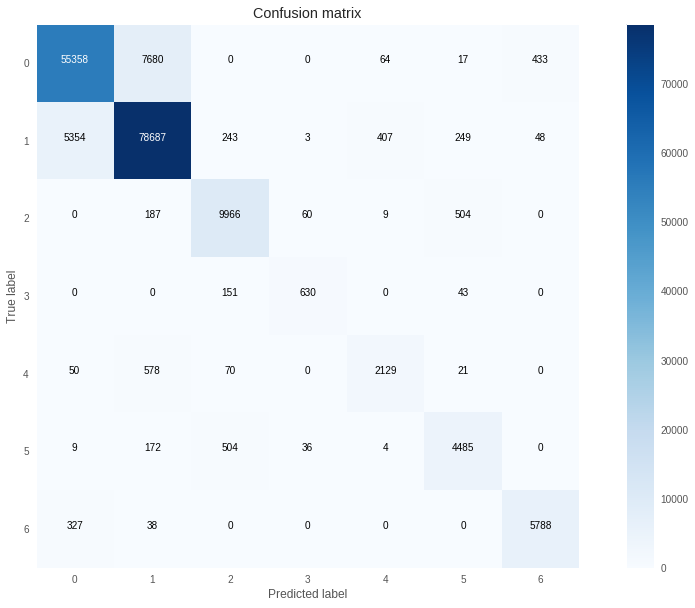

In [132]:
cnf_matrix = confusion_matrix(Y_test,preds_max_complex)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()

# Xgboost

In [37]:
import xgboost as xgb

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X_train_r, X_valid,Y_train_r,Y_valid = train_test_split(X_train,Y_train, test_size=0.1, random_state=0,stratify=Y_train.Cover_Type)

In [39]:
model=xgb.XGBClassifier(n_estimators=1500,learning_rate=0.02,max_depth=7,objective='multi:softprob',nthread=-1,scale_pos_weight=1)

In [40]:
model.fit(X_train.values,Y_train.values.ravel(),eval_metric='mlogloss',eval_set=[(X_valid.values,Y_valid.values.ravel())],verbose=True,early_stopping_rounds=550)

[0]	validation_0-mlogloss:1.90497
Will train until validation_0-mlogloss hasn't improved in 550 rounds.
[1]	validation_0-mlogloss:1.8661
[2]	validation_0-mlogloss:1.82927
[3]	validation_0-mlogloss:1.79403
[4]	validation_0-mlogloss:1.76014
[5]	validation_0-mlogloss:1.72792
[6]	validation_0-mlogloss:1.69706
[7]	validation_0-mlogloss:1.66752
[8]	validation_0-mlogloss:1.63918
[9]	validation_0-mlogloss:1.61162
[10]	validation_0-mlogloss:1.58518
[11]	validation_0-mlogloss:1.55959
[12]	validation_0-mlogloss:1.53505
[13]	validation_0-mlogloss:1.51134
[14]	validation_0-mlogloss:1.48841
[15]	validation_0-mlogloss:1.46605
[16]	validation_0-mlogloss:1.44426
[17]	validation_0-mlogloss:1.42321
[18]	validation_0-mlogloss:1.40288
[19]	validation_0-mlogloss:1.38313
[20]	validation_0-mlogloss:1.36398
[21]	validation_0-mlogloss:1.34541
[22]	validation_0-mlogloss:1.32714
[23]	validation_0-mlogloss:1.30948
[24]	validation_0-mlogloss:1.29237
[25]	validation_0-mlogloss:1.27571
[26]	validation_0-mlogloss:1.25

[225]	validation_0-mlogloss:0.452674
[226]	validation_0-mlogloss:0.451838
[227]	validation_0-mlogloss:0.451011
[228]	validation_0-mlogloss:0.450276
[229]	validation_0-mlogloss:0.449505
[230]	validation_0-mlogloss:0.448825
[231]	validation_0-mlogloss:0.448011
[232]	validation_0-mlogloss:0.447222
[233]	validation_0-mlogloss:0.446491
[234]	validation_0-mlogloss:0.445745
[235]	validation_0-mlogloss:0.445023
[236]	validation_0-mlogloss:0.444384
[237]	validation_0-mlogloss:0.44359
[238]	validation_0-mlogloss:0.442812
[239]	validation_0-mlogloss:0.442149
[240]	validation_0-mlogloss:0.441462
[241]	validation_0-mlogloss:0.440785
[242]	validation_0-mlogloss:0.440054
[243]	validation_0-mlogloss:0.439116
[244]	validation_0-mlogloss:0.438516
[245]	validation_0-mlogloss:0.437899
[246]	validation_0-mlogloss:0.437071
[247]	validation_0-mlogloss:0.436451
[248]	validation_0-mlogloss:0.435677
[249]	validation_0-mlogloss:0.4351
[250]	validation_0-mlogloss:0.434301
[251]	validation_0-mlogloss:0.433511
[252

[448]	validation_0-mlogloss:0.359874
[449]	validation_0-mlogloss:0.359688
[450]	validation_0-mlogloss:0.3595
[451]	validation_0-mlogloss:0.35927
[452]	validation_0-mlogloss:0.359101
[453]	validation_0-mlogloss:0.358886
[454]	validation_0-mlogloss:0.358714
[455]	validation_0-mlogloss:0.35836
[456]	validation_0-mlogloss:0.358138
[457]	validation_0-mlogloss:0.357929
[458]	validation_0-mlogloss:0.357767
[459]	validation_0-mlogloss:0.357494
[460]	validation_0-mlogloss:0.357242
[461]	validation_0-mlogloss:0.357003
[462]	validation_0-mlogloss:0.356786
[463]	validation_0-mlogloss:0.356621
[464]	validation_0-mlogloss:0.35643
[465]	validation_0-mlogloss:0.356081
[466]	validation_0-mlogloss:0.355846
[467]	validation_0-mlogloss:0.355677
[468]	validation_0-mlogloss:0.35523
[469]	validation_0-mlogloss:0.354837
[470]	validation_0-mlogloss:0.354632
[471]	validation_0-mlogloss:0.354333
[472]	validation_0-mlogloss:0.354112
[473]	validation_0-mlogloss:0.353851
[474]	validation_0-mlogloss:0.353721
[475]	v

[671]	validation_0-mlogloss:0.312934
[672]	validation_0-mlogloss:0.312686
[673]	validation_0-mlogloss:0.312544
[674]	validation_0-mlogloss:0.312371
[675]	validation_0-mlogloss:0.312233
[676]	validation_0-mlogloss:0.312102
[677]	validation_0-mlogloss:0.311941
[678]	validation_0-mlogloss:0.311727
[679]	validation_0-mlogloss:0.311523
[680]	validation_0-mlogloss:0.311426
[681]	validation_0-mlogloss:0.31124
[682]	validation_0-mlogloss:0.311105
[683]	validation_0-mlogloss:0.310939
[684]	validation_0-mlogloss:0.310731
[685]	validation_0-mlogloss:0.310559
[686]	validation_0-mlogloss:0.310391
[687]	validation_0-mlogloss:0.310246
[688]	validation_0-mlogloss:0.310073
[689]	validation_0-mlogloss:0.309925
[690]	validation_0-mlogloss:0.309712
[691]	validation_0-mlogloss:0.309497
[692]	validation_0-mlogloss:0.309375
[693]	validation_0-mlogloss:0.309234
[694]	validation_0-mlogloss:0.30906
[695]	validation_0-mlogloss:0.308891
[696]	validation_0-mlogloss:0.308767
[697]	validation_0-mlogloss:0.30864
[698

[894]	validation_0-mlogloss:0.278719
[895]	validation_0-mlogloss:0.278601
[896]	validation_0-mlogloss:0.278412
[897]	validation_0-mlogloss:0.278254
[898]	validation_0-mlogloss:0.278117
[899]	validation_0-mlogloss:0.27799
[900]	validation_0-mlogloss:0.277842
[901]	validation_0-mlogloss:0.277762
[902]	validation_0-mlogloss:0.277513
[903]	validation_0-mlogloss:0.277351
[904]	validation_0-mlogloss:0.277073
[905]	validation_0-mlogloss:0.2769
[906]	validation_0-mlogloss:0.276548
[907]	validation_0-mlogloss:0.276379
[908]	validation_0-mlogloss:0.276141
[909]	validation_0-mlogloss:0.275899
[910]	validation_0-mlogloss:0.275772
[911]	validation_0-mlogloss:0.275488
[912]	validation_0-mlogloss:0.275328
[913]	validation_0-mlogloss:0.275184
[914]	validation_0-mlogloss:0.275003
[915]	validation_0-mlogloss:0.274719
[916]	validation_0-mlogloss:0.274584
[917]	validation_0-mlogloss:0.274375
[918]	validation_0-mlogloss:0.274199
[919]	validation_0-mlogloss:0.274052
[920]	validation_0-mlogloss:0.273925
[921

[1113]	validation_0-mlogloss:0.245838
[1114]	validation_0-mlogloss:0.245743
[1115]	validation_0-mlogloss:0.245612
[1116]	validation_0-mlogloss:0.245465
[1117]	validation_0-mlogloss:0.245331
[1118]	validation_0-mlogloss:0.245188
[1119]	validation_0-mlogloss:0.24501
[1120]	validation_0-mlogloss:0.24482
[1121]	validation_0-mlogloss:0.244697
[1122]	validation_0-mlogloss:0.244629
[1123]	validation_0-mlogloss:0.244385
[1124]	validation_0-mlogloss:0.244247
[1125]	validation_0-mlogloss:0.244097
[1126]	validation_0-mlogloss:0.244026
[1127]	validation_0-mlogloss:0.243873
[1128]	validation_0-mlogloss:0.243735
[1129]	validation_0-mlogloss:0.24366
[1130]	validation_0-mlogloss:0.243583
[1131]	validation_0-mlogloss:0.243435
[1132]	validation_0-mlogloss:0.243309
[1133]	validation_0-mlogloss:0.243164
[1134]	validation_0-mlogloss:0.243014
[1135]	validation_0-mlogloss:0.242858
[1136]	validation_0-mlogloss:0.242768
[1137]	validation_0-mlogloss:0.242609
[1138]	validation_0-mlogloss:0.242498
[1139]	validati

[1330]	validation_0-mlogloss:0.219636
[1331]	validation_0-mlogloss:0.219541
[1332]	validation_0-mlogloss:0.219474
[1333]	validation_0-mlogloss:0.219362
[1334]	validation_0-mlogloss:0.219317
[1335]	validation_0-mlogloss:0.219236
[1336]	validation_0-mlogloss:0.219139
[1337]	validation_0-mlogloss:0.219043
[1338]	validation_0-mlogloss:0.218976
[1339]	validation_0-mlogloss:0.218916
[1340]	validation_0-mlogloss:0.218844
[1341]	validation_0-mlogloss:0.21877
[1342]	validation_0-mlogloss:0.218701
[1343]	validation_0-mlogloss:0.218602
[1344]	validation_0-mlogloss:0.218432
[1345]	validation_0-mlogloss:0.218334
[1346]	validation_0-mlogloss:0.21823
[1347]	validation_0-mlogloss:0.218152
[1348]	validation_0-mlogloss:0.217961
[1349]	validation_0-mlogloss:0.217824
[1350]	validation_0-mlogloss:0.217706
[1351]	validation_0-mlogloss:0.217531
[1352]	validation_0-mlogloss:0.217384
[1353]	validation_0-mlogloss:0.217296
[1354]	validation_0-mlogloss:0.217146
[1355]	validation_0-mlogloss:0.217078
[1356]	validat

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [41]:
pred=model.predict(X_test.values)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(pred,Y_test.values)

0.90939713652759102

In [44]:
model.feature_importances_

array([  6.14868850e-02,   4.18594517e-02,   2.43231319e-02,
         2.21966729e-02,   2.99062543e-02,   3.99525203e-02,
         3.80697772e-02,   3.74074690e-02,   3.07211168e-02,
         4.76472192e-02,   9.76739153e-02,   3.43117267e-02,
         2.64700577e-02,   5.52749410e-02,   4.76230346e-02,
         4.61942330e-02,   5.81083633e-02,   8.10417607e-02,
         7.67162815e-02,   1.43624435e-03,   4.17478289e-03,
         2.20087706e-03,   5.08080749e-03,   1.47903396e-03,
         2.21948116e-03,   2.60458819e-05,   7.06959618e-05,
         5.45103103e-04,   5.41940378e-03,   3.25573515e-03,
         1.89948897e-03,   4.30129142e-03,   8.33468221e-04,
         0.00000000e+00,   1.63344888e-03,   3.04178684e-03,
         1.28368993e-04,   5.76730235e-04,   2.04832247e-03,
         5.37661428e-04,   2.31622299e-03,   4.09850571e-03,
         3.90874268e-03,   1.17206466e-04,   7.33005523e-04,
         7.68353522e-04,   1.23717939e-03,   3.89758009e-03,
         2.70133000e-03,

In [45]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_cols=list(X_train.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(52):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print("%d. feature %s : %f" % (f + 1, x_cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Ele_minus_VDtHyd : 0.097674
2. feature Fire_plus_Road : 0.081042
3. feature Fire_minus_Road : 0.076716
4. feature Elevation : 0.061487
5. feature Hydro_minus_Road : 0.058108
6. feature Hydro_plus_Fire : 0.055275
7. feature Horizontal_Distance_To_Fire_Points : 0.047647
8. feature Hydro_minus_Fire : 0.047623
9. feature Hydro_plus_Road : 0.046194
10. feature Aspect : 0.041859
11. feature Horizontal_Distance_To_Roadways : 0.039953
12. feature Hillshade_9am : 0.038070
13. feature Hillshade_Noon : 0.037407
14. feature Ele_plus_VDtHyd : 0.034312
15. feature Hillshade_3pm : 0.030721
16. feature Vertical_Distance_To_Hydrology : 0.029906
17. feature Distanse_to_Hydrology : 0.026470
18. feature Slope : 0.024323
19. feature Horizontal_Distance_To_Hydrology : 0.022197
20. feature Wilderness_Area_1 : 0.008076
21. feature Wilderness_Area_3 : 0.007680
22. feature Soil_Type_10 : 0.005419
23. feature Soil_Type_4 : 0.005081
24. feature Soil_Type_33 : 0.004519
25. feature Soil_

In [46]:
from sklearn.feature_selection import SelectFromModel
model1 = SelectFromModel(model, prefit=True)
X_train_red_rf_features = model1.transform(X_train)
idxs_selected_sfm = model1.get_support(indices=True)
print(X_train_red_rf_features.shape)

(174303, 19)


In [47]:
idxs_selected_sfm

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [48]:
X_test_red_rf_features = model1.transform(X_test)

In [49]:
X_test_red_rf_features.shape

(406709, 19)

In [56]:
from sklearn.feature_selection import SelectKBest # use this later
from sklearn.feature_selection import mutual_info_classif

# Bayesian Deep Learning with edward

In [174]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Normal
#ed.set_seed(42)
plt.style.use('ggplot')

In [247]:
def neural_network(X):
    h = tf.tanh(tf.matmul(X, W_0) + b_0)
    h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.tanh(tf.matmul(h, W_2) + b_2)
    #h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.matmul(h, W_3) + b_3
    return (h)

In [248]:


N = X_train.shape[0]  # number of data points
D = X_train.shape[1]   # number of features

# DATA
#X_train, y_train = build_toy_dataset(N)

In [276]:
M=400 # batch size

In [249]:
N,D

(406708, 63)

In [282]:
# MODEL
X = tf.placeholder(tf.float32, [M, D])
y_ph = tf.placeholder(tf.float32, [M,7])
with tf.name_scope("model"):
    W_0 = Normal(loc=tf.zeros([D, 100]), scale=tf.ones([D, 100]), name="W_0")
    W_1 = Normal(loc=tf.zeros([100, 50]), scale=tf.ones([100, 50]), name="W_1")
    W_2 = Normal(loc=tf.zeros([50, 20]), scale=tf.ones([50, 20]), name="W_2")
    W_3 = Normal(loc=tf.zeros([20,7]), scale=tf.ones([20, 7]), name="W_2")
    b_0 = Normal(loc=tf.zeros(100), scale=tf.ones(100), name="b_0")
    b_1 = Normal(loc=tf.zeros(50), scale=tf.ones(50), name="b_1")
    b_2 = Normal(loc=tf.zeros(20), scale=tf.ones(20), name="b_2")
    b_3 = Normal(loc=tf.zeros(7), scale=tf.ones(7), name="b_3")
    y = Normal(loc=neural_network(X), scale=0.1 * tf.ones([M,7]))

In [283]:
# INFERENCE
with tf.name_scope("posterior"):
    with tf.name_scope("qW_0"):
        qW_0 = Normal(loc=tf.Variable(tf.random_normal([D, 100]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([D, 100]), name="scale")))
    with tf.name_scope("qW_1"):
        qW_1 = Normal(loc=tf.Variable(tf.random_normal([100, 50]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([100, 50]), name="scale")))
    with tf.name_scope("qW_2"):
        qW_2 = Normal(loc=tf.Variable(tf.random_normal([50, 20]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([50,20]), name="scale")))
    with tf.name_scope("qW_3"):
        qW_3 = Normal(loc=tf.Variable(tf.random_normal([20, 7]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([20,7]), name="scale")))
    with tf.name_scope("qb_0"):
        qb_0 = Normal(loc=tf.Variable(tf.random_normal([100]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([100]), name="scale")))
    with tf.name_scope("qb_1"):
        qb_1 = Normal(loc=tf.Variable(tf.random_normal([50]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([50]), name="scale")))
    with tf.name_scope("qb_2"):
        qb_2 = Normal(loc=tf.Variable(tf.random_normal([20]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([20]), name="scale")))
    with tf.name_scope("qb_3"):
        qb_3 = Normal(loc=tf.Variable(tf.random_normal([7]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([7]), name="scale")))



In [262]:
Y_train_1hot=pd.get_dummies(Y_train_df,columns=['Cover_Type'])

In [263]:
Y_train_1hot=Y_train_1hot.astype('float')

In [284]:
def generator(arrays, batch_size):
    starts = [0] * len(arrays)  # pointers to where we are in iteration
    while True:
        batches = []
        for i, array in enumerate(arrays):
            start = starts[i]
            stop = start + batch_size
            diff = stop - array.shape[0]
            if diff <= 0:
                batch = array[start:stop]
                starts[i] += batch_size
            else:
                batch = np.concatenate((array[start:], array[:diff]))
                starts[i] = diff
            batches.append(batch)
        yield batches

In [285]:
data = generator([X_train, Y_train_1hot.values], M)

In [286]:
n_batch = int(N / M)
n_epoch = 100

In [287]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1,
                     W_2: qW_2, b_2: qb_2,
                     W_3: qW_3, b_3: qb_3}, data={ y: y_ph})

In [289]:
#inference = ed.KLqp({w: qw, b: qb}, data={y: y_ph})
inference.initialize(n_iter=n_batch * n_epoch, n_samples=5, scale={y: N / M})
tf.global_variables_initializer().run()

for _ in range(inference.n_iter):

    X_batch, y_batch = next(data)
    #print(X_batch.shape,y_batch.shape)
    info_dict = inference.update({X: X_batch, y_ph: y_batch})
    inference.print_progress(info_dict)

101600/101600 [100%] ██████████████████████████████ Elapsed: 1128s | Loss: 5743214.500


In [ ]:
y_post = ed.copy(y, {W_0: qW_0, b_0: qb_0,W_1: qW_1, b_1: qb_1,W_2: qW_2, b_2: qb_2,W_3: qW_3, b_3: qb_3})

In [ ]:
print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: X_test, y_post: y_test}))

print("Mean absolute error on test data:")
print(ed.evaluate('mean_absolute_error', data={X: X_test, y_post: y_test}))

# Bayesian Deep Learning using PyMC3

In [39]:
#import theano.tensor as tt
#import pymc3 as pm

In [39]:
%matplotlib inline
import theano
floatX = theano.config.floatX
import pymc3 as pm
import theano.tensor as tt
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons

In [55]:
#X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
#X = scale(X)
#X = X.astype(floatX)
#Y = Y.astype(floatX)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

In [56]:
#fig, ax = plt.subplots()
#ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
#ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
#sns.despine(); ax.legend()
#ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [103]:
#Y_train_1hot=pd.get_dummies(Y_train,columns=['Cover_Type'])

In [40]:
X_train_fromtest=X_test
Y_train_fromtest=Y_test
X_test_fromtrain=X_train
Y_test_fromtrain=Y_test

In [41]:
Y_train_1hot=pd.get_dummies(Y_train_fromtest,columns=['Cover_Type'])

In [42]:
Y_test_1hot=pd.get_dummies(Y_test_fromtrain,columns=['Cover_Type'])

In [43]:
X_train_fromtest.shape

(174304, 63)

In [44]:
def construct_nn(ann_input, ann_output):
    n_hidden_1 = 500
    n_hidden_2=300
    n_hidden_3=200
    n_hidden_4=100

    # Initialize random weights between each layer
    init_1 = np.random.randn(X_train.shape[1], n_hidden_1).astype(floatX)
    init_2 = np.random.randn(n_hidden_1, n_hidden_2).astype(floatX)
    init_3 = np.random.randn(n_hidden_2, n_hidden_3).astype(floatX)
    init_4 = np.random.randn(n_hidden_3, n_hidden_4).astype(floatX)
    init_out = np.random.randn(n_hidden_4,Y_train_1hot.shape[1]).astype(floatX)

    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1,shape=(X_train.shape[1], n_hidden_1),testval=init_1)

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1,shape=(n_hidden_1, n_hidden_2),testval=init_2)
        
        # Weights from input to hidden layer
        weights_2_3 = pm.Normal('w_2_3', 0, sd=1,shape=(n_hidden_2, n_hidden_3),testval=init_3)

        # Weights from 1st to 2nd layer
        weights_3_4 = pm.Normal('w_3_4', 0, sd=1,shape=(n_hidden_3, n_hidden_4),testval=init_4)

        # Weights from hidden layer to output
        weights_4_out = pm.Normal('w_4_out', 0, sd=1,shape=(n_hidden_4,Y_train_1hot.shape[1]),testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1,weights_1_2))
        act_3 = pm.math.tanh(pm.math.dot(act_2,weights_2_3))
        act_4 = pm.math.tanh(pm.math.dot(act_3, weights_3_4))
        act_out = tt.nnet.softmax(pm.math.dot(act_4, weights_4_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Multinomial('out',n=1,
                           p=act_out,
                           observed=ann_output,
                           total_size=Y_train_1hot.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network


ann_input = theano.shared(X_train_fromtest.values)
ann_output = theano.shared(Y_train_1hot.values)
neural_network = construct_nn(ann_input, ann_output)

In [48]:
#ann_input = theano.shared(X_train)
#ann_output = theano.shared(Y_train)
#neural_network = construct_nn(ann_input, ann_output)

In [45]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [51]:
#with neural_network:
#    inference = pm.ADVI()
#    approx = pm.fit(n=30000, method=inference)

Average Loss = 198.01: 100%|██████████| 30000/30000 [00:19<00:00, 1535.12it/s]
Finished [100%]: Average Loss = 198


In [ ]:
minibatch_x = pm.Minibatch(X_train_fromtest.values, batch_size=300)
minibatch_y = pm.Minibatch(Y_train_1hot.values, batch_size=300)
neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    approx = pm.fit(100000, method=pm.ADVI(),callbacks=[pm.callbacks.CheckParametersConvergence(diff='relative')])

Average Loss = 3.4869e+05:  26%|██▋       | 26483/100000 [58:50<2:43:20,  7.50it/s]

In [51]:
with neural_network_minibatch:
    trace = approx.sample(draws=5000)

In [52]:
#trace

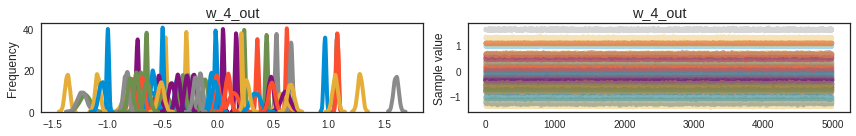

In [59]:
pm.traceplot(trace,varnames=['w_4_out']);

In [54]:
# Replace shared variables with testing set
ann_input.set_value(X_test_fromtrain.values)
ann_output.set_value(Y_test_1hot.values)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=neural_network_minibatch, samples=5000)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

100%|██████████| 5000/5000 [03:45<00:00, 22.21it/s]


In [61]:
#ppc

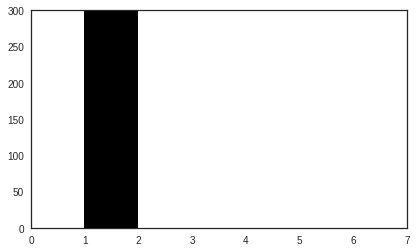

In [55]:
preds_proba = ppc['out'].mean(axis=0)
preds = (preds_proba == np.max(preds_proba, axis=1, keepdims=True)) * 1
plt.pcolor(preds)

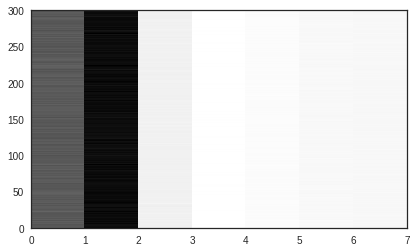

In [56]:
plt.pcolor(preds_proba)

In [ ]:
plt.pcolor(ppc['out'].std(axis=0))

In [57]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_1hot, preds))

ValueError: Found input variables with inconsistent numbers of samples: [174304, 300]

# Weka Run

In [39]:
import weka.core.jvm as jvm

In [40]:
jvm.start(packages=True,class_path=['C:\\Program Files\\Weka-3-8\\weka.jar','C:\\Program Files\\Weka-3-8\\weka-src.jar'])

DEBUG:weka.core.jvm:Adding user-supplied classpath=C:\Program Files\Weka-3-8\weka.jar
DEBUG:weka.core.jvm:Adding user-supplied classpath=C:\Program Files\Weka-3-8\weka-src.jar
DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Adding Weka packages
ERROR:weka.core.jvm:package_dir not found: H:\\wekafiles\packages
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Program Files\\Weka-3-8\\weka.jar', 'C:\\Program Files\\Weka-3-8\\weka-src.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.j

In [41]:
from weka.classifiers import Classifier

In [59]:
from weka.classifiers import Classifier
from weka.core.classes import from_commandline

cmdline='weka.classifiers.meta.LogitBoost -P 100 -L -1.7976931348623157E308 -H 1.0 -Z 3.0 -O 1 -E 1 -S 1 -I 10 -W weka.classifiers.trees.RandomForest -- -P 100 -I 100 -num-slots 4 -K 0 -M 1.0 -V 0.001 -S 1'

classifier = from_commandline(cmdline, classname="weka.classifiers.Classifier")
#cls = Classifier(classname="weka.classifiers.meta.LogitBoost",options=["-W","weka.classifiers.trees.RandomForest", "-O","4"])

In [60]:
classifier.to_commandline()

'weka.classifiers.meta.LogitBoost -P 100 -L -1.7976931348623157E308 -H 1.0 -Z 3.0 -O 1 -E 1 -S 1 -I 10 -W weka.classifiers.trees.RandomForest -- -P 100 -I 100 -num-slots 4 -K 0 -M 1.0 -V 0.001 -S 1'

In [61]:
print(cls.to_help())

weka.classifiers.meta.LogitBoost

DESCRIPTION

Class for performing additive logistic regression. 
This class performs classification using a regression scheme as the base learner, and can handle multi-class problems.  For more information, see

J. Friedman, T. Hastie, R. Tibshirani (1998). Additive Logistic Regression: a Statistical View of Boosting. Stanford University.

OPTIONS

-Q
	Use resampling instead of reweighting for boosting.

-use-estimated-priors
	Use estimated priors rather than uniform ones.

-P <percent>
	Percentage of weight mass to base training on.
	(default 100, reduce to around 90 speed up)

-L <num>
	Threshold on the improvement of the likelihood.
	(default -Double.MAX_VALUE)

-H <num>
	Shrinkage parameter.
	(default 1)

-Z <num>
	Z max threshold for responses.
	(default 3)

-O <int>
	The size of the thread pool, for example, the number of cores in the CPU. (default 1)

-E <int>
	The number of threads to use for batch prediction, which should be >= size of thread 

In [62]:
X_train_df=pd.DataFrame(X_train,columns=features_imp)

In [63]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
train_df=pd.concat([X_train_df, Y_train_df], axis=1)

In [64]:
train_df.reset_index(inplace=True)

In [65]:
train_df.set_index('index',inplace=True)

In [66]:
train_df.to_csv('Train_file.csv',sep=',',index=False)

In [67]:
import weka.core.converters as converters
from weka.core.converters import Loader
#helper.print_title("Loading CSV file") 
loader = Loader(classname="weka.core.converters.CSVLoader") 
data = loader.load_file("Train_file.csv") 
#print(str(data)) 
#converters.load_any_file("creditcard.csv")

In [343]:
#data.delete_first_attribute()

In [68]:
from weka.filters import Filter
nominal = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
#print(nominal.to_help())

In [69]:
nominal.inputformat(data)
nominaldata1 = nominal.filter(data)
nominaldata1.class_is_last()

In [70]:
#print(cls)

In [71]:
cls.build_classifier(nominaldata1)

JavaException: GC overhead limit exceeded

In [64]:
for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[ 1.  0.  0.]
2: label index=0.0, class distribution=[ 1.  0.  0.]
3: label index=0.0, class distribution=[ 1.  0.  0.]
4: label index=0.0, class distribution=[ 1.  0.  0.]
5: label index=0.0, class distribution=[ 1.  0.  0.]
6: label index=0.0, class distribution=[ 1.  0.  0.]
7: label index=0.0, class distribution=[ 1.  0.  0.]
8: label index=0.0, class distribution=[ 1.  0.  0.]
9: label index=0.0, class distribution=[ 1.  0.  0.]
10: label index=0.0, class distribution=[ 1.  0.  0.]
11: label index=0.0, class distribution=[ 1.  0.  0.]
12: label index=0.0, class distribution=[ 1.  0.  0.]
13: label index=0.0, class distribution=[ 1.  0.  0.]
14: label index=0.0, class distribution=[ 1.  0.  0.]
15: label index=0.0, class distribution=[ 1.  0.  0.]
16: label index=0.0, class distribution=[ 1.  0.  0.]
17: label index=0.0, class distribution=[ 1.  0.  0.]
18: label index=0.0, class distribution=[ 1.  0.  0.]
19: label index=0.0, class distributi

In [66]:
#from weka.classifiers import Classifier
#cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
#cls.build_classifier(data)

#print(cls)

import weka.plot.graph as graph  # NB: pygraphviz and PIL are required
graph.plot_dot_graph(cls.graph)

ERROR:weka.plot.graph:Pygraphviz is not installed, cannot generate graph plot!


J48 pruned tree
------------------

petalwidth <= 0.6: Iris-setosa (50.0)
petalwidth > 0.6
|   petalwidth <= 1.7
|   |   petallength <= 4.9: Iris-versicolor (48.0/1.0)
|   |   petallength > 4.9
|   |   |   petalwidth <= 1.5: Iris-virginica (3.0)
|   |   |   petalwidth > 1.5: Iris-versicolor (3.0/1.0)
|   petalwidth > 1.7: Iris-virginica (46.0/1.0)

Number of Leaves  : 	5

Size of the tree : 	9



In [67]:
jvm.stop()